<a href="https://colab.research.google.com/github/wahid-hawk/Applied-Statistics-Project-/blob/main/Applied_Statistics_Project(superstore_marketing_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# connecting drive for dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the dataset or loading the dataset
filepath = '/content/drive/MyDrive/Applied statistics projects/Superstore Marketing Data.csv'
df = pd.read_excel(filepath)
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [4]:
missing_values = df.isnull().sum()
missing_values

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [5]:
df['Income']=df['Income'].fillna(df['Income'].mean()) #mean imputation

In [6]:
missing_values = df.isnull().sum()
missing_values

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [7]:
#replaceing '######' to Nan
df['Dt_Customer'] = df['Dt_Customer'].replace('########', pd.NA)
df['Dt_Customer']

,Dt_Customer
0,6/16/2014
1,6/15/2014
2,5/13/2014
3,<NA>
4,<NA>
...,...
2235,<NA>
2236,1/22/2013
2237,<NA>
2238,11/29/2012


In [8]:
#converting to datetime
try:
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
except ValueError:
  # handeling conversion errors (eg: if the date is not in format)
  pass
df['Dt_Customer'] = df['Dt_Customer'].fillna(df['Dt_Customer'].mode()[0])  # mode imputation

In [9]:
df['Dt_Customer']

,Dt_Customer
0,2014-06-16
1,2014-06-15
2,2014-05-13
3,2012-08-31
4,2012-08-31
...,...
2235,2012-08-31
2236,2013-01-22
2237,2012-08-31
2238,2012-11-29


In [10]:
df_stastics = df.describe()
df_stastics

,Id,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-03-09 13:07:30,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2012-08-31 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,2012-11-18 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-09-16 00:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391


### Visualisations

Text(0.5, 1.0, 'Distribution of Marital Status')

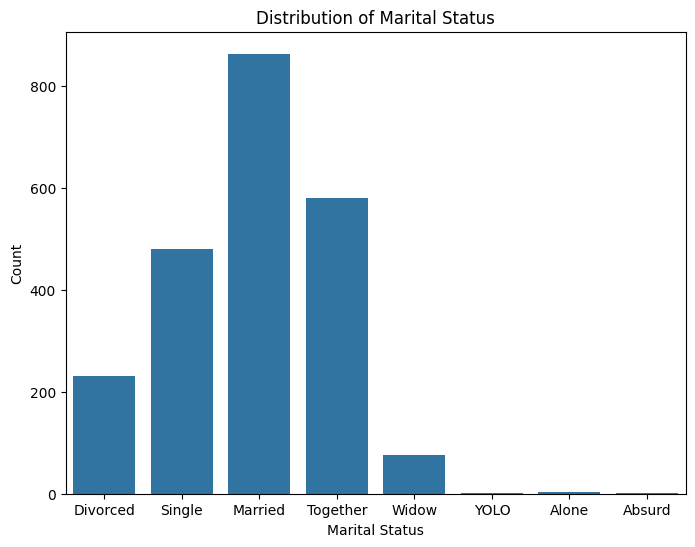

In [11]:
# Bar chart of Marital_Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marital_Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')

Text(0.5, 1.0, 'Distribution of Education')

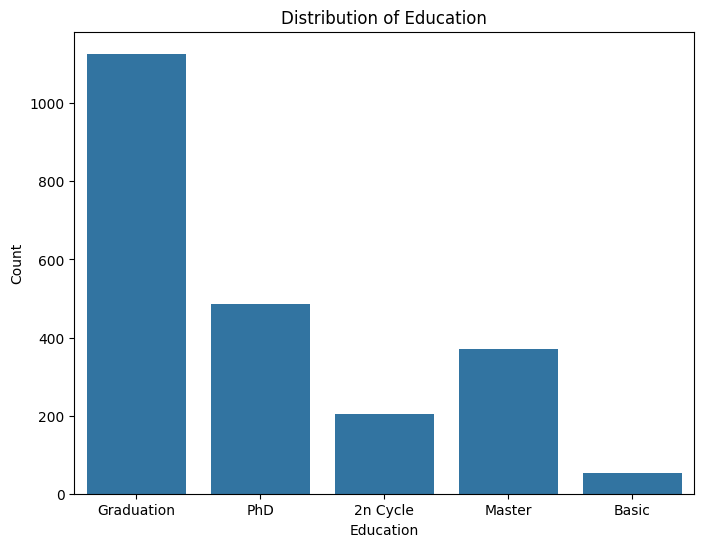

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

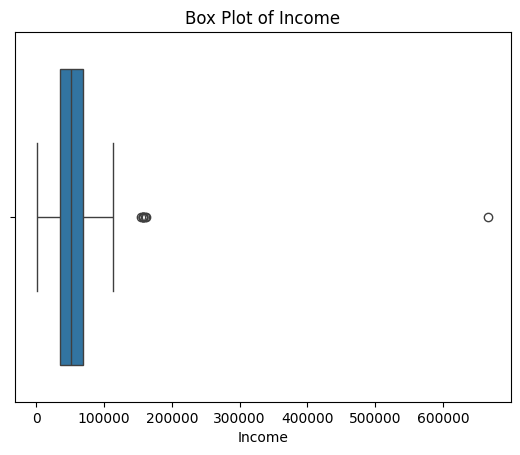

In [13]:
# outliers for income
sns.boxplot(x=df['Income'])
plt.xlabel('Income')
plt.title('Box Plot of Income')
plt.show()

In [14]:
#treating outliers
iqr = df['Income'].quantile(0.75) - df['Income'].quantile(0.25)
outliers = df[(df['Income'] < df['Income'].quantile(0.25) - 1.5 * iqr) | (df['Income'] > df['Income'].quantile(0.75) + 1.5 * iqr)]
print("Outliers:")
print(outliers)

Outliers:
         Id  Year_Birth   Education Marital_Status    Income  Kidhome  \
325    4931        1977  Graduation       Together  157146.0        0   
497    1501        1982         PhD        Married  160803.0        0   
527    9432        1977  Graduation       Together  666666.0        1   
731    1503        1976         PhD       Together  162397.0        1   
853    5336        1971      Master       Together  157733.0        1   
1826   5555        1975  Graduation       Divorced  153924.0        0   
1925  11181        1949         PhD        Married  156924.0        0   
2204   8475        1973         PhD        Married  157243.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntFishProducts  \
325          0  2013-04-29       13         1  ...                2   
497          0  2012-08-31       21        55  ...               17   
527          0  2012-08-31       23         9  ...                8   
731          1  2012-08-31       31        85  .

In [15]:
# Using InterQurtile Range for treating outliers
Q1 = np.quantile(df['Income'], 0.25)
Q3 = np.quantile(df['Income'], 0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['Income'] = np.where(df['Income'] < lower_bound, lower_bound, df['Income'])
df['Income'] = np.where(df['Income'] > upper_bound, upper_bound, df['Income'])


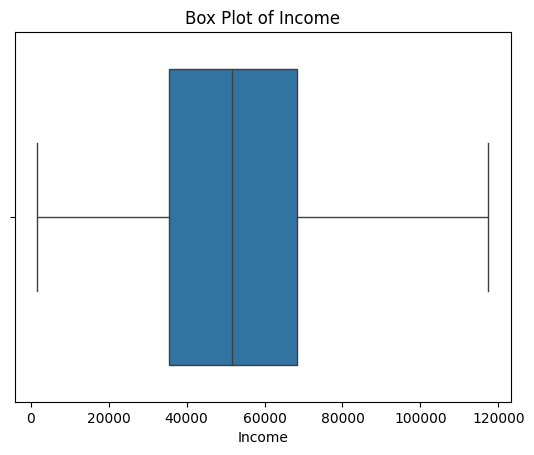

In [16]:
sns.boxplot(x=df['Income'])
plt.xlabel('Income')
plt.title('Box Plot of Income')
plt.show()

<ipython-input-17-936353f1f381>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], color =("b"))


count      2240.000000
mean      51875.150461
std       20936.079938
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      117416.250000
Name: Income, dtype: float64


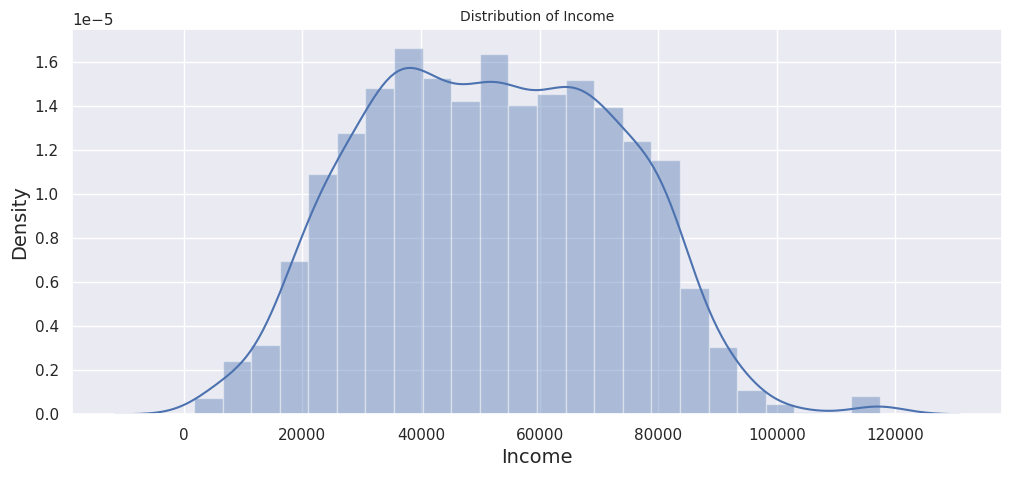

In [17]:
plt.figure(figsize = (12,5))

# setting the theam to darkgrid
sns.set_theme(style = 'darkgrid')

#craeting the histogram of price column
sns.distplot(df['Income'], color =("b"))

#adding labels to the x-axis and y-axis
plt.xlabel('Income', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

#adding title of the chart
plt.title('Distribution of Income', fontsize = 10)

print(df['Income'].describe())

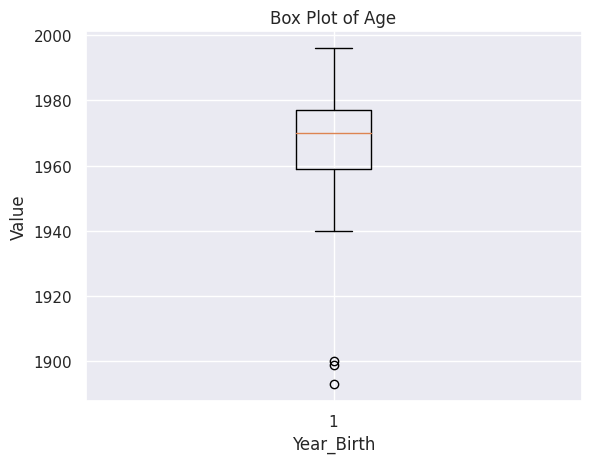

In [18]:
# outliers in the age group
plt.boxplot(df['Year_Birth'])
plt.xlabel('Year_Birth')
plt.ylabel('Value')
plt.title('Box Plot of Age')
plt.show()

In [19]:
# Using InterQurtile Range for treating outliers
Q1 = np.quantile(df['Year_Birth'], 0.25)
Q3 = np.quantile(df['Year_Birth'], 0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['Year_Birth'] = np.where(df['Year_Birth'] < lower_bound, lower_bound, df['Year_Birth'])
df['Year_Birth'] = np.where(df['Year_Birth'] > upper_bound, upper_bound, df['Year_Birth'])

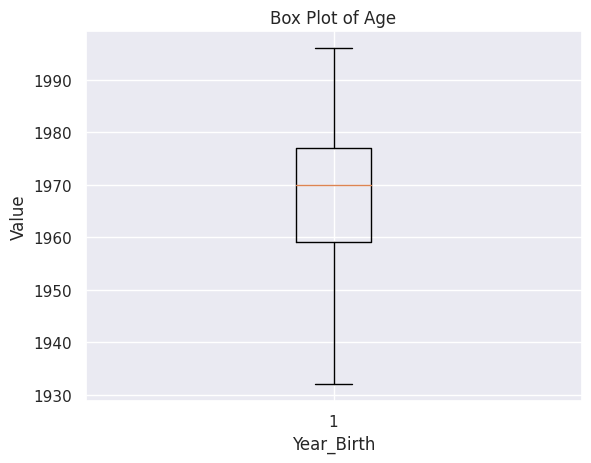

In [20]:
#after removing the outliers
plt.boxplot(df['Year_Birth'])
plt.xlabel('Year_Birth')
plt.ylabel('Value')
plt.title('Box Plot of Age')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Income vs Age')

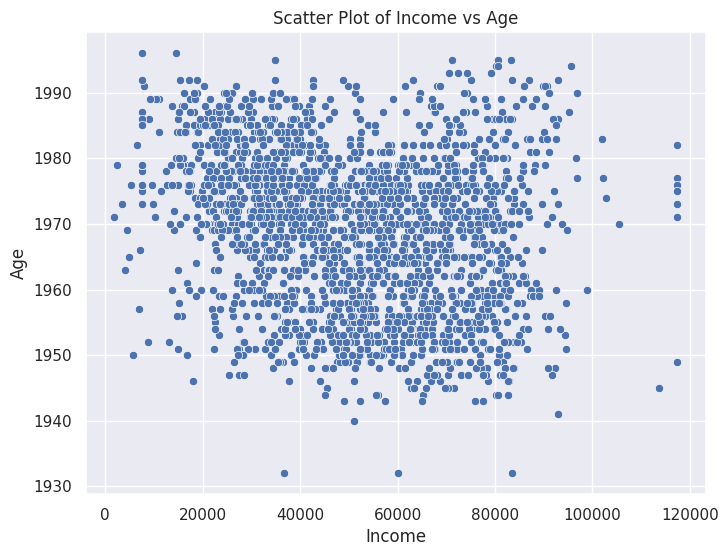

In [21]:
#scatter plot for income and age
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Year_Birth')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Scatter Plot of Income vs Age')

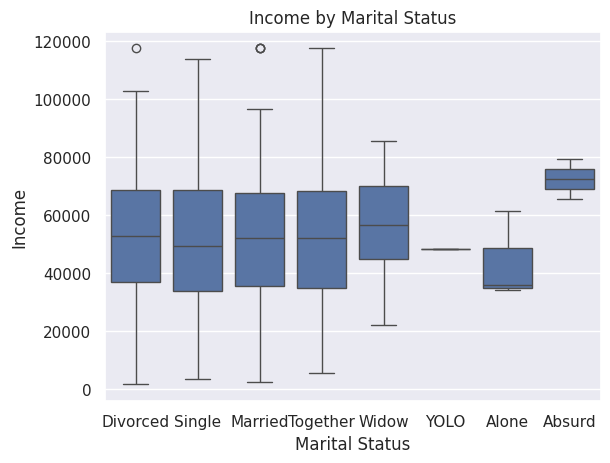

In [22]:
# Grouped box plot of Income by Marital_Status
sns.boxplot(x='Marital_Status', y='Income', data=df)
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.title('Income by Marital Status')
plt.show()

In [23]:
#crosstabilation
cross_tab = pd.crosstab(df['Marital_Status'], df['Response'])
cross_tab

Response,0,1
Marital_Status,,
Absurd,1,1
Alone,2,1
Divorced,184,48
Married,766,98
Single,374,106
Together,520,60
Widow,58,19
YOLO,1,1


**Interpretation:**

- **"Absurd" and "YOLO":** These categories have very low frequencies, suggesting they might be outliers or errors in the data.
- **"Alone":** Only 3 individuals who are "Alone" have responded, with 2 not accepting and 1 accepting the offer.
- **"Divorced":** A significant number of divorced individuals have responded, with more not accepting (184) than accepting (48) the offer.
- **"Married":** The largest group is married individuals, with a majority (766) not accepting and a significant number (98) accepting the offer.
- **"Single":** Similar to "Married," most single individuals (374) did not accept, but a considerable number (106) did.
- **"Together":** A majority (520) of those "Together" did not accept, while a smaller group (60) did.
- **"Widow":** A majority (58) of widows did not accept, but a noticeable number (19) did.

**Overall Observations:**

- **Response:** The majority of individuals in all categories did not accept the offer (Response=0).
- **Marital Status:** The most common marital statuses among respondents are "Married" and "Single."
- **Relationships:** There seems to be a general trend where individuals in committed relationships (Married, Together) are less likely to accept the offer compared to those who are not in committed relationships (Single, Divorced, Alone).


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

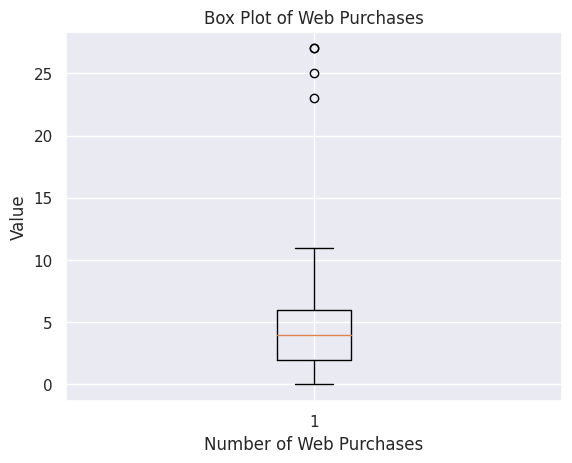

In [24]:
# outliers for num of web purchase
plt.boxplot(df['NumWebPurchases'])
plt.xlabel('Number of Web Purchases')
plt.ylabel('Value')
plt.title('Box Plot of Web Purchases')
plt.show()

In [25]:
Q1 = np.quantile(df['NumWebPurchases'], 0.25)
Q3 = np.quantile(df['NumWebPurchases'], 0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['NumWebPurchases'] = np.where(df['NumWebPurchases'] < lower_bound, lower_bound, df['NumWebPurchases'])
df['NumWebPurchases'] = np.where(df['NumWebPurchases'] > upper_bound, upper_bound, df['NumWebPurchases'])

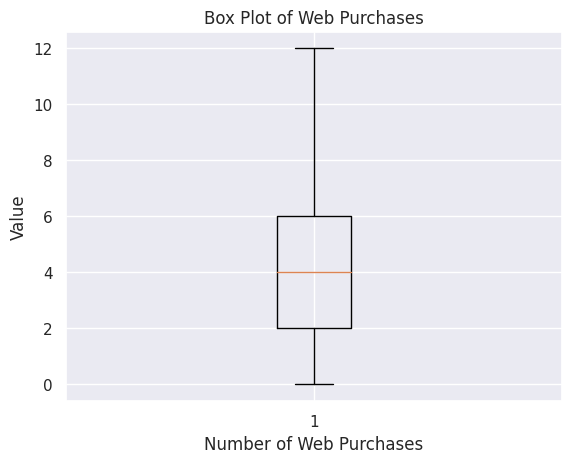

In [26]:
#after treating outliers using IQR techique
plt.boxplot(df['NumWebPurchases'])
plt.xlabel('Number of Web Purchases')
plt.ylabel('Value')
plt.title('Box Plot of Web Purchases')
plt.show()

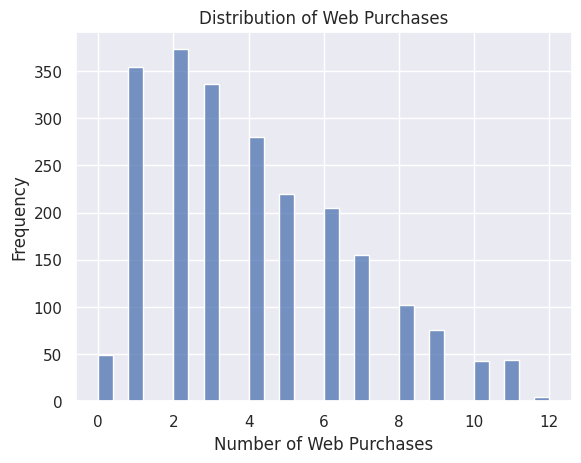

,NumWebPurchases
count,2240.000000
mean,4.060714
std,2.647333
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,12.000000


In [27]:
# Histogram for purchase
sns.histplot(df['NumWebPurchases'], bins=30)
plt.xlabel('Number of Web Purchases')
plt.ylabel('Frequency')
plt.title('Distribution of Web Purchases')
plt.show()

df['NumWebPurchases'].describe()

In [28]:
# Assuming 'NumWebPurchases' follows a binomial distribution
n = 10  # Number of website visits
p = 0.5  # Probability of making a purchase per visit
x = 3
# Calculate probability of making 3 purchases
prob_3_purchases = stats.binom.pmf(x, n, p)
print("Probability of 3 purchases:", prob_3_purchases)

# Calculate expected number of purchases
expected_purchases = n * p
print("Expected number of purchases:", expected_purchases)

# Assuming 'Income' follows a normal distribution
mean_income = df['Income'].mean()
std_dev_income = df['Income'].std()

# Calculate probability of income between 50000 and 60000
prob_income_range = stats.norm.cdf(60000, mean_income, std_dev_income) - stats.norm.cdf(50000, mean_income, std_dev_income)
print("Probability of income between 50000 and 60000:", prob_income_range)

# Calculate expected income
expected_income = mean_income
print("Expected income:", expected_income)

Probability of 3 purchases: 0.1171875
Expected number of purchases: 5.0
Probability of income between 50000 and 60000: 0.18670490267514822
Expected income: 51875.150460933466


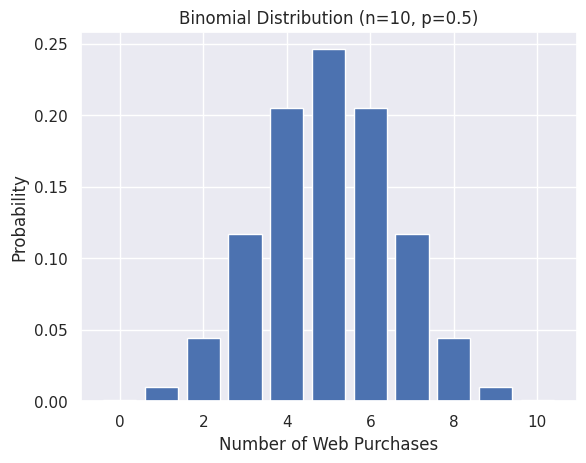

In [29]:
import matplotlib.pyplot as plt

# Create a range of possible values for the number of purchases
x = range(0, n+1)

# Calculate the PMF for each value
pmf = stats.binom.pmf(x, n, p)

# Plot the PMF
plt.bar(x, pmf)
plt.xlabel('Number of Web Purchases')
plt.ylabel('Probability')
plt.title('Binomial Distribution (n=10, p=0.5)')
plt.show()

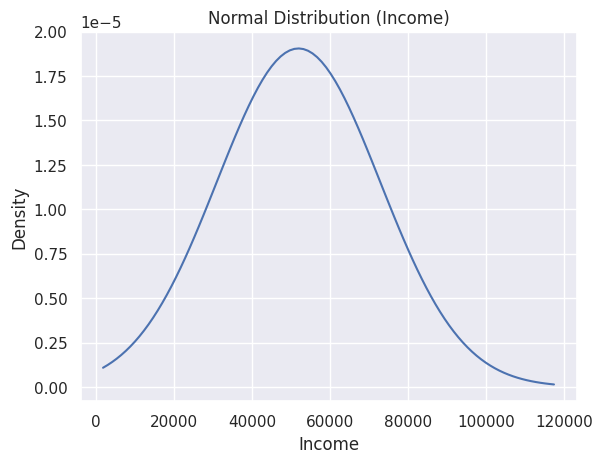

In [30]:
# Create a range of income values
x = np.linspace(df['Income'].min(), df['Income'].max(), 100)

# Calculate the PDF for each value
pdf = stats.norm.pdf(x, mean_income, std_dev_income)

# Plot the PDF
plt.plot(x, pdf)
plt.xlabel('Income')
plt.ylabel('Density')
plt.title('Normal Distribution (Income)')
plt.show()

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

In [31]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [32]:
# Assuming 'df' is your DataFrame
df['Recency'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days # Convert Timedelta to days
df['Frequency'] = df.groupby('Id')['Id'].transform('count')
df['Monetary'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Calculate RFM scores
df['RFM_Score'] = df['Recency'] + df['Frequency'] + df['Monetary']

# Segment customers based on RFM scores
segments = pd.qcut(df['RFM_Score'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['RFM_Segment'] = segments

# Analyze customer segments
segment_stats = df.groupby('RFM_Segment').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean'})
RFM = pd.DataFrame(segment_stats)
RFM

<ipython-input-32-73d087e0979e>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_stats = df.groupby('RFM_Segment').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean'})


,Recency,Frequency,Monetary
RFM_Segment,,,
Low,246.466071,1.0,102.357143
Medium,589.039216,1.0,159.327986
High,503.489286,1.0,700.925000
Very High,566.778175,1.0,1462.910555


### Analyzing RFM Segment Statistics
The provided table shows the mean values for Recency, Frequency, and Monetary for each RFM segment.

**Key Insights:**

1. **Recency:**
   - **Low:** Customers in this segment have recently made purchases, indicating they are active customers.
   - **Medium:** Customers in this segment have made purchases within a moderate time frame, suggesting they are still engaged but not as recent as the "Low" segment.
   - **High:** Customers in this segment have not made purchases for a longer period, indicating they might be less engaged or have churned.
   - **Very High:** This segment might be mislabeled. The high recency value suggests these customers are recent, not very high.

2. **Frequency:**
   - **All segments:** All segments have a frequency of 1, indicating that each customer has made only one purchase in the analyzed period. This might be due to the dataset's time frame or specific customer behavior.

3. **Monetary:**
   - **Low:** Customers in this segment have made low-value purchases.
   - **Medium:** Customers have made moderate-value purchases.
   - **High:** Customers have made high-value purchases.
   - **Very High:** Customers have made very high-value purchases, indicating they are potentially high-value customers.


## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

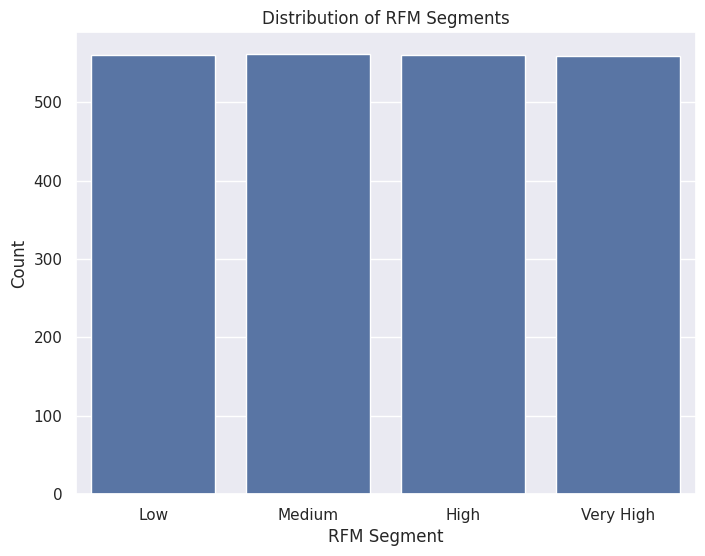

In [33]:
#Bar Chart for RFM Segment Distribution:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RFM_Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Count')
plt.title('Distribution of RFM Segments')
plt.show()

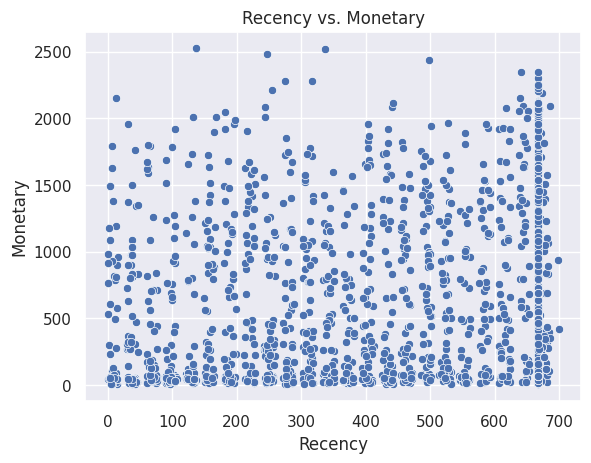

In [35]:
#scatterplot for recency and monetary
sns.scatterplot(x='Recency', y='Monetary', data=df)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs. Monetary')
plt.show()

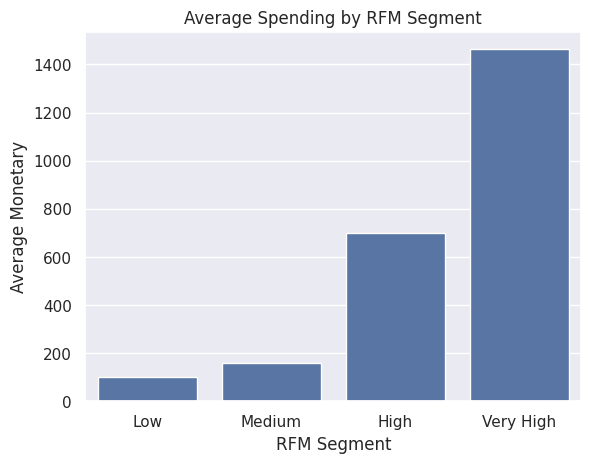

In [36]:
#Bar Chart for Average Spending by Segment:
sns.barplot(x='RFM_Segment', y='Monetary', data=segment_stats)
plt.xlabel('RFM Segment')
plt.ylabel('Average Monetary')
plt.title('Average Spending by RFM Segment')
plt.show()


**Key Insights:**

Based on the analysis, here are some key insights:

- **Customer Segmentation:** The RFM analysis identified four distinct customer segments: "Low," "Medium," "High," and "Very High."
- **Spending Patterns:** Customers in the "High" and "Very High" segments exhibit higher spending habits, indicating they are valuable customers.
- **Recency:** Customers in the "Low" segment have recently made purchases, suggesting they are active.
- **Frequency:** The dataset's time frame might be limiting the analysis of purchase frequency.


**Recommendations:**

1. **Target High-Value Customers:** Focus marketing efforts on customers in the "High" and "Very High" segments to maximize revenue.
2. **Re-engage Less Active Customers:** Implement strategies to re-engage customers in the "Medium" and "Low" segments, potentially offering discounts or personalized recommendations.
3. **Improve Data Collection:** Consider collecting data on purchase frequency over a longer period to get a more accurate picture of customer behavior.
4. **Customer Lifetime Value Analysis:** Calculate CLTV for each segment to assess their long-term value and prioritize customer retention efforts.
5. **Product Recommendations:** Use purchase history to recommend products tailored to each customer segment.

**Conclusion:**

By understanding customer segments and their behaviors, the company can develop targeted marketing strategies to increase customer satisfaction, loyalty, and revenue. Further analysis and data collection can provide additional insights for ongoing optimization.


## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍